<a href="https://colab.research.google.com/github/hsy19y/-/blob/main/6%EC%A3%BC%EC%B0%A8_0410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [117]:
## y = x^2 의 미분값 구하기
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
  y = x ** 2  
dy_dx = tape.gradient(y,x)
dy_dx.numpy()

4.0

In [118]:
 g = tf.random.Generator.from_seed(2020)
 x= g.normal(shape=(10,))
 y = 3*x - 2

In [119]:
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.20943771,  1.2746525 ,  1.213214  , -0.17576952,  1.876984  ,
        0.16379918,  1.082245  ,  0.6199966 , -0.44402212,  1.3048344 ],
      dtype=float32)>

In [120]:
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-2.628313  ,  1.8239574 ,  1.6396422 , -2.5273085 ,  3.630952  ,
       -1.5086024 ,  1.2467351 , -0.14001012, -3.3320663 ,  1.9145031 ],
      dtype=float32)>

In [121]:
##lose함수 정의하기
def cal_mse(x, y, a, b):
    y_pred = a*x +b
    squared_error = (y_pred - y) ** 2
    mean_squared_error = tf.reduce_mean(squared_error)

    return mean_squared_error

In [122]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)
ggrade = []
inter = []

EPOCHS = 500

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y, a, b)
    if mse < 0.00001:
     break
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
#   print("[] :   d_a : []  d_b : []\n", format(epoch, d_a, d_b))
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)
    ggrade.append(a.numpy())
    inter.append(b.numpy())
#    print("a = []  b = [] \n", format(a,b))
    if epoch % 10 == 0:
     print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))

EPOCH 10 - MSE : 2.3022 - a: 1.16 - b : -0.30
EPOCH 20 - MSE : 1.1415 - a: 1.74 - b : -0.75
EPOCH 30 - MSE : 0.5733 - a: 2.11 - b : -1.11
EPOCH 40 - MSE : 0.2881 - a: 2.37 - b : -1.37
EPOCH 50 - MSE : 0.1448 - a: 2.56 - b : -1.55
EPOCH 60 - MSE : 0.0728 - a: 2.69 - b : -1.68
EPOCH 70 - MSE : 0.0366 - a: 2.78 - b : -1.77
EPOCH 80 - MSE : 0.0184 - a: 2.84 - b : -1.84
EPOCH 90 - MSE : 0.0092 - a: 2.89 - b : -1.89
EPOCH 100 - MSE : 0.0046 - a: 2.92 - b : -1.92
EPOCH 110 - MSE : 0.0023 - a: 2.94 - b : -1.94
EPOCH 120 - MSE : 0.0012 - a: 2.96 - b : -1.96
EPOCH 130 - MSE : 0.0006 - a: 2.97 - b : -1.97
EPOCH 140 - MSE : 0.0003 - a: 2.98 - b : -1.98
EPOCH 150 - MSE : 0.0001 - a: 2.99 - b : -1.99
EPOCH 160 - MSE : 0.0001 - a: 2.99 - b : -1.99
EPOCH 170 - MSE : 0.0000 - a: 2.99 - b : -1.99
EPOCH 180 - MSE : 0.0000 - a: 2.99 - b : -1.99


In [123]:
##1회 d_a, d_b 값 구하기기
d_a_1 = -np.sum(x*y)/10*2
d_b_1 = -np.sum(y)/10*2
print("1 : d_a : {}  d_b : {}  ".format(d_a_1, d_b_1))

1 : d_a : -3.423411560058594  d_b : -0.023897886276245117  


In [124]:
##데이터셋 생성(노이즈 첨가)
g = tf.random.Generator.from_seed(2020)
x1 = g.normal(shape = (10,))
noise = np.random.normal(0.1, size = (10,))
y = 3*x - 2 + noise

In [10]:
a_0 = 0; b_0 =0
a_1 = a_0_1

NameError: ignored

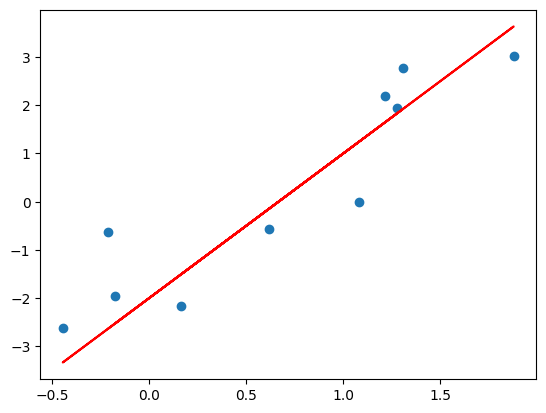

In [125]:
y_pred = 3 * x -2
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'r')
plt.show()

In [126]:
##데이터셋 생성(노이즈 첨가) 
g = tf.random.Generator.from_seed(2020)
x1 = g.normal(shape=(10,))
noise1 = np.random.normal(-abs(noise),abs(noise),size = (10,))
y_1 = 3 * x - 2 + noise_1 

In [127]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)
ggrade = []
inter = []

EPOCHS = 1000

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y_1, a, b)
#    if mse < 0.00001:
#     break
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
#   print("[] :   d_a : []  d_b : []\n", format(epoch, d_a, d_b))
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)
    ggrade.append(a.numpy())
    inter.append(b.numpy())
#    print("a = []  b = [] \n", format(a,b))
    if epoch % 20 == 0:
     print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))

EPOCH 20 - MSE : 1.8436 - a: 1.16 - b : -1.03
EPOCH 40 - MSE : 1.1764 - a: 1.71 - b : -1.59
EPOCH 60 - MSE : 1.0079 - a: 1.99 - b : -1.87
EPOCH 80 - MSE : 0.9653 - a: 2.13 - b : -2.01
EPOCH 100 - MSE : 0.9546 - a: 2.20 - b : -2.08
EPOCH 120 - MSE : 0.9519 - a: 2.23 - b : -2.11
EPOCH 140 - MSE : 0.9512 - a: 2.25 - b : -2.13
EPOCH 160 - MSE : 0.9510 - a: 2.26 - b : -2.14
EPOCH 180 - MSE : 0.9510 - a: 2.26 - b : -2.15
EPOCH 200 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 220 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 240 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 260 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 280 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 300 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 320 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 340 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 360 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 380 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 400 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 420 - MSE : 0.9509 - a: 2.27 - b : -2.15
EPOCH 440 - MSE :

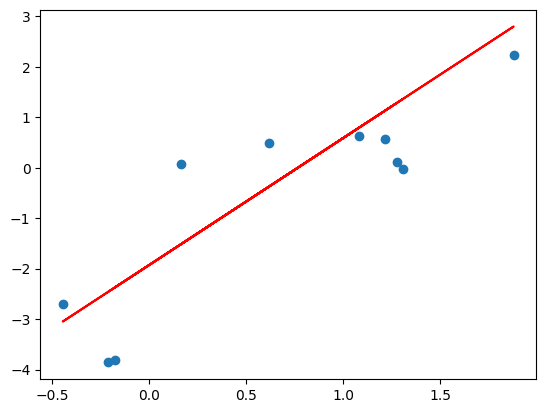

In [128]:
y_pred = 2.52 * x -1.93
plt.scatter(x,y_1)
plt.plot(x,y_pred, color = 'r')
plt.show()

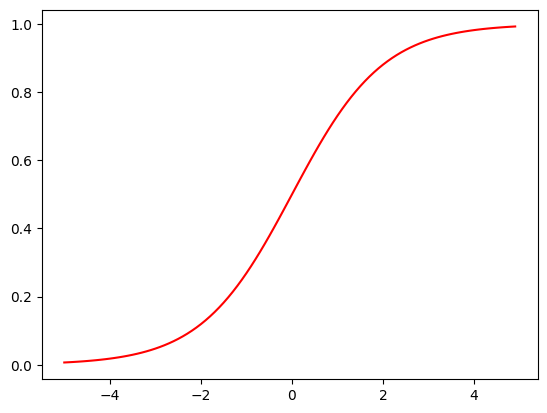

In [101]:
xx = tf.range(-5,5,0.1)
yy = tf.nn.sigmoid(xx)
plt.plot(xx,yy, 'r-')
plt.show()

In [102]:
with tf.GradientTape() as tape:
    tape.watch(xx)
    yy = tf.sigmoid(xx)
dy = tape.gradient(yy,xx)

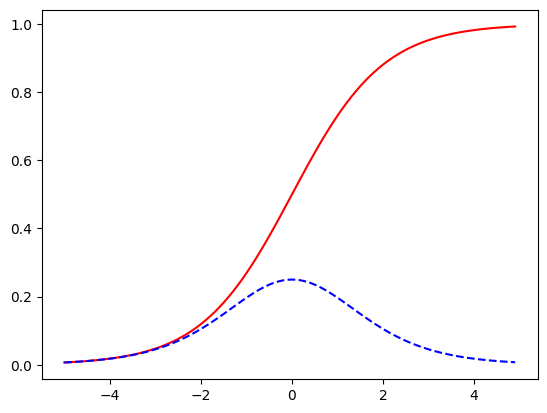

In [103]:
plt.plot(xx,yy, "r-")
plt.plot(xx,dy, "b--")
plt.show()

과제 : break 조건
## ex)
1. mse < 0.00001
2. mse -mse < 0.000001

##경사하강법

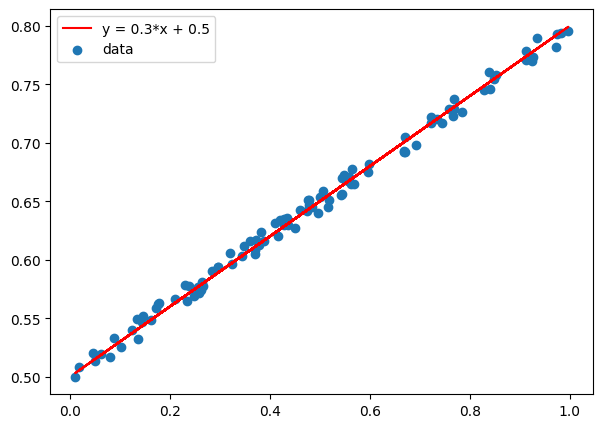

w: 0.3, b: 0.5


In [129]:
def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.rand(size)
  y = w*x+b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y+noise
  plt.figure(figsize = (7,5))
  plt.plot(x, y, color='r', label= f'y = {w}*x + {b}')
  plt.scatter(x,yy,label = 'data')
  plt.legend(fontsize = 10)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x,yy

x,y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.01)

##시각화

In [105]:
plt.figure(figsize = (7.5))
plt.plot(errors)
plt.xlabel('E')
plt.ylabel('errors')
plt.show()

TypeError: ignored

##단순 선형 회귀 모델 만들기
1. 데이터 생성
2. 단순 선형 회귀 모델 만들기
3. 컴파일
4. 훈련
5. 검증
6. 예측측

In [130]:
##데이터 셋 만들기
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

In [131]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [132]:
##옵티마이저: 경사하강법, 손실함수 : 평균제곱오차함수, 평가치표: 평균절대오차
model1.compile(optimizer='sgd', loss = 'mse', metrics = ['mae'])

In [133]:
##훈련: 데이터셋 사용, 에포크 지정
history1 = model1.fit(x,y,epochs=1200)

Epoch 1/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1200 - mae: 0.2811
Epoch 2/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1144 - mae: 0.2756
Epoch 3/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1116 - mae: 0.2725
Epoch 4/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1084 - mae: 0.2693
Epoch 5/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1054 - mae: 0.2664
Epoch 6/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1035 - mae: 0.2645
Epoch 7/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1019 - mae: 0.2629
Epoch 8/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.1001 - mae: 0.2607
Epoch 9/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.0989 - mae: 0.2595
Epoch 10/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.0976 - mae: 0.2580
Epoch 11/1200
4/4 [==============================] - 0s 4ms/step - lo

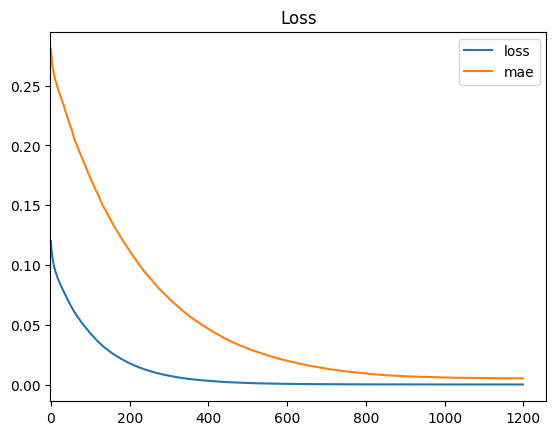

In [134]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['mae'], label='mae')
plt.xlim(-1.20)
plt.title('Loss')
plt.legend()
plt.show()

In [135]:
model1.predict([10])

1/1 [==============================] - 0s 75ms/step


array([[3.5103207]], dtype=float32)

##단순선형회귀
1. 데이터는 변수 1개인 1차 리스트 형식
2. 1개의 노드로 이루어진 텐스레이어 1개개

In [112]:
x = np.arange(1, 6)
y1 = 3*x + 2
print(x, y1)

[1 2 3 4 5] [ 5  8 11 14 17]


In [113]:
type(x)

numpy.ndarray

In [114]:
type(y1)

numpy.ndarray

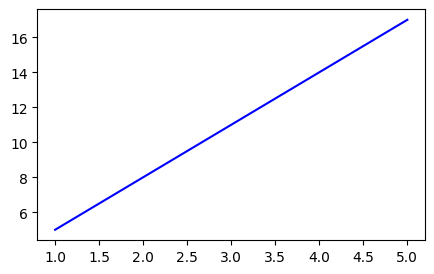

In [115]:
plt.figure(figsize = (5, 3))
plt.plot(x, y1, 'b-')
plt.show()

In [ ]:
model1 = tf.keras,Sequential([
    

과제 : break 조건

ex)
1. mse < 0.00001
2. mse -mse < 0.000001



In [158]:
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape = (10,))
noise = np.random.normal(0.1, size = (10,))
y = 3 * x  - 2 + noise

In [167]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 250

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y, a, b)
    if mse < 0.00001:
     break
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
#   print("[] :   d_a : []  d_b : []\n", format(epoch, d_a, d_b))
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)
    ggrade.append(a.numpy())
    inter.append(b.numpy())
#    print("a = []  b = [] \n", format(a,b))
    if epoch % 10 == 0:
     print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))

EPOCH 10 - MSE : 3.5082 - a: 1.22 - b : -0.37
EPOCH 20 - MSE : 2.1210 - a: 1.85 - b : -0.87
EPOCH 30 - MSE : 1.4388 - a: 2.26 - b : -1.27
EPOCH 40 - MSE : 1.0962 - a: 2.55 - b : -1.55
EPOCH 50 - MSE : 0.9241 - a: 2.75 - b : -1.75
EPOCH 60 - MSE : 0.8376 - a: 2.89 - b : -1.90
EPOCH 70 - MSE : 0.7941 - a: 2.99 - b : -2.00
EPOCH 80 - MSE : 0.7722 - a: 3.06 - b : -2.07
EPOCH 90 - MSE : 0.7612 - a: 3.11 - b : -2.12
EPOCH 100 - MSE : 0.7557 - a: 3.15 - b : -2.16
EPOCH 110 - MSE : 0.7529 - a: 3.17 - b : -2.18
EPOCH 120 - MSE : 0.7515 - a: 3.19 - b : -2.20
EPOCH 130 - MSE : 0.7508 - a: 3.20 - b : -2.21
EPOCH 140 - MSE : 0.7505 - a: 3.21 - b : -2.22
EPOCH 150 - MSE : 0.7503 - a: 3.22 - b : -2.23
EPOCH 160 - MSE : 0.7502 - a: 3.22 - b : -2.23
EPOCH 170 - MSE : 0.7502 - a: 3.23 - b : -2.24
EPOCH 180 - MSE : 0.7501 - a: 3.23 - b : -2.24
EPOCH 190 - MSE : 0.7501 - a: 3.23 - b : -2.24
EPOCH 200 - MSE : 0.7501 - a: 3.23 - b : -2.24
EPOCH 210 - MSE : 0.7501 - a: 3.23 - b : -2.24
EPOCH 220 - MSE : 0.75

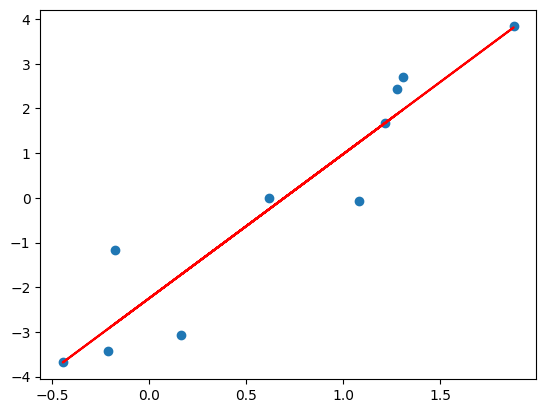

In [170]:
y_pred = 3.23 * x- 2.25
plt.scatter(x,y)
plt.plot(x,y_pred,color = 'r')
plt.show()

In [151]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 300
mse_1 = 0.0

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y, a, b)
    if abs(mse - mse_1) < 0.000001:
     break
     mse_1 = mse
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
#   print("[] :   d_a : []  d_b : []\n", format(epoch, d_a, d_b))
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)
    ggrade.append(a.numpy())
    inter.append(b.numpy())
#    print("a = []  b = [] \n", format(a,b))
    if epoch % 10 == 0:
     print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))

EPOCH 10 - MSE : 2.9231 - a: 1.03 - b : -0.42
EPOCH 20 - MSE : 1.7916 - a: 1.59 - b : -0.88
EPOCH 30 - MSE : 1.2307 - a: 1.96 - b : -1.24
EPOCH 40 - MSE : 0.9490 - a: 2.21 - b : -1.50
EPOCH 50 - MSE : 0.8074 - a: 2.40 - b : -1.68
EPOCH 60 - MSE : 0.7363 - a: 2.52 - b : -1.81
EPOCH 70 - MSE : 0.7005 - a: 2.61 - b : -1.91
EPOCH 80 - MSE : 0.6825 - a: 2.68 - b : -1.97
EPOCH 90 - MSE : 0.6735 - a: 2.73 - b : -2.02
EPOCH 100 - MSE : 0.6690 - a: 2.76 - b : -2.05
EPOCH 110 - MSE : 0.6667 - a: 2.78 - b : -2.07
EPOCH 120 - MSE : 0.6655 - a: 2.80 - b : -2.09
EPOCH 130 - MSE : 0.6650 - a: 2.81 - b : -2.10
EPOCH 140 - MSE : 0.6647 - a: 2.82 - b : -2.11
EPOCH 150 - MSE : 0.6645 - a: 2.82 - b : -2.12
EPOCH 160 - MSE : 0.6644 - a: 2.83 - b : -2.12
EPOCH 170 - MSE : 0.6644 - a: 2.83 - b : -2.12
EPOCH 180 - MSE : 0.6644 - a: 2.83 - b : -2.13
EPOCH 190 - MSE : 0.6644 - a: 2.83 - b : -2.13
EPOCH 200 - MSE : 0.6644 - a: 2.83 - b : -2.13
EPOCH 210 - MSE : 0.6644 - a: 2.83 - b : -2.13
EPOCH 220 - MSE : 0.66

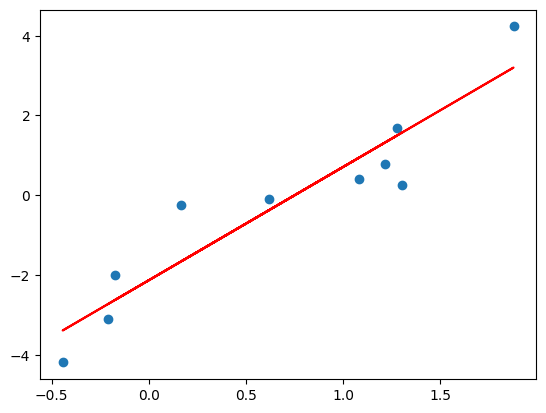

In [157]:
y_pred = 2.84*x -2.13
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'r')
plt.show()